In [1]:
#Import libraries
import os
import string
import math
import numpy as np
import matplotlib
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from numpy import *
import scipy.constants
from collections import defaultdict

if os.name == "nt":
    dirDelim = "\\"
else:
    dirDelim = "/"

# Adjust the plot line thickness, tick mark thickness, etc.
matplotlib.rcParams['axes.linewidth'] = 1.5
matplotlib.rcParams['xtick.major.size'] = 10
matplotlib.rcParams['xtick.major.width'] = 2
matplotlib.rcParams['xtick.major.size'] = 10
matplotlib.rcParams['ytick.major.width'] = 2
matplotlib.rcParams['xtick.minor.size'] = 5
matplotlib.rcParams['xtick.minor.width'] = 2
matplotlib.rcParams['xtick.minor.size'] = 5
matplotlib.rcParams['ytick.minor.width'] = 2

In [2]:
"""
HOT SHOCK BUBBLE
Equations and initial parameters from FG2012: http://arxiv.org/abs/1204.2547
Solutions = energy conserving 
"""

#Initial parameters
#alpha= 1.0 #0 < alpha < 2
L_AGN = 10.0**46.0
L_in= 10.0**46.0 #erg/s = (g*cm^2/s^2)/s
nH_0= 100.0 # particles/cm^3
rho_0 = nH_0*(scipy.constants.m_p*1000.0) #g/cm^3
vin= 30000.0*(10.0**5.0) #cm/s, was 30000.0 km/s
R0= 100.0*(3.086*(10.0**18)) #cm, was pc for all numerical sim
Tin = 1.0
c= scipy.constants.c*(100.0) #cm/s, was 300000000.0 m/s
L_in= L_AGN*Tin*(vin/c)

#Constants derived for energy conserving shock in FG2012 AppendixA
def A_E(alpha):
    A_E = ((((5.0-alpha)**2.0)*(3.0-alpha)*L_in)/(36.0*np.pi*rho_0*(R0**alpha)))**(1.0/(5.0-alpha))
    return A_E
def Beta_E(alpha):
    Beta_E = 3.0/(5.0-alpha)
    return Beta_E

#Determine timesteps using range 10^2 yr < t < 10^9 yr
num= 1000
time = np.linspace((10.0**2.0)*(3.154*(10.0**7.0)),(10.0**9.0)*(3.154*(10.0**7.0)),num) #convert yr to s
Rs=[];vs=[];Rsw_approx=[]

alpha= 1.0
#Calculate Rs and vs from derived constants and calculate approximate Rsw for when Rsw<<Rs
for t in range(num):
    Rs.append(A_E(alpha)*(time[t]**Beta_E(alpha)))
    vs.append(((3.0/2.0)*(((3.0-alpha)*L_in*Tin*vin)/((5.0-alpha)*np.pi*c*(R0**alpha)*rho_0))**(1.0/3.0))*Rs[t]**((alpha-2.0)/3.0))
    Rsw_approx.append(Rs[t]*np.sqrt((2.0*vs[t])/vin))

1.0447667583702628e+19
1523397584.583909


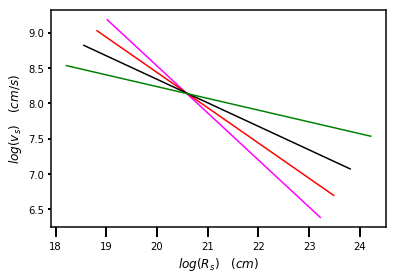

In [3]:
#Test to recreate plot from paper by calculating Rs and vs from t
Rs_t=defaultdict(list);vs_t=defaultdict(list)

for i in range(4):
    alpha = i*0.5
    #Calculate Rs and vs from derived constants
    for t in range(num):
        Rs_temp = A_E(alpha)*(time[t]**Beta_E(alpha))
        Rs_t[i+1].append(Rs_temp)
        vs_t[i+1].append(((3.0/2.0)*(((3.0-alpha)*L_in*Tin*vin)/((5.0-alpha)*np.pi*c*(R0**alpha)*rho_0))**(1.0/3.0))*Rs_temp**((alpha-2.0)/3.0))
        #vs_t[i+1].append((Beta_E(alpha)*Rs_temp)/time[t])


        
print(Rs_t[1][0])
print(vs_t[1][0])
        
#Plot Rs and vs (for alpha=0, 0.5, 1, 1.5) to try to recreate plot from paper
plt.plot(np.log10(Rs_t[1]),np.log10(vs_t[1]),color='magenta',linestyle="-",marker='',markersize=3)
plt.plot(np.log10(Rs_t[2]),np.log10(vs_t[2]),color='red',linestyle="-",marker='',markersize=3)
plt.plot(np.log10(Rs_t[3]),np.log10(vs_t[3]),color='black',linestyle="-",marker='',markersize=3)
plt.plot(np.log10(Rs_t[4]),np.log10(vs_t[4]),color='green',linestyle="-",marker='',markersize=3)
plt.xlabel(r'$log(R_s) \quad (cm)$', fontsize=12)
plt.ylabel(r'$log(v_s) \quad (cm/s)$', fontsize=12)
plt.savefig('FGShockBubble_logRsVSvs_test.png',bbox_inches='tight')
plt.show()

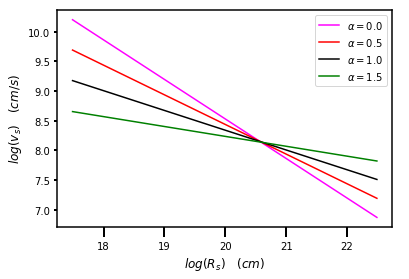

In [4]:
#Test to recreate plot from paper by calculating vs from Rs
vs_t=defaultdict(list)
Rs_chosen = np.linspace((10**(-1.0))*(3.086*(10.0**18)),(10.0**4.0)*(3.086*(10.0**18)),num) #convert pc to cm

for i in range(4):
    alpha = i*0.5
    #Calculate vs from derived constants and Rs
    for rs in range(num):
        vs_t[i+1].append(((3.0/2.0)*(((3.0-alpha)*L_in*Tin*vin)/((5.0-alpha)*np.pi*c*(R0**alpha)*rho_0))**(1.0/3.0))*Rs_chosen[rs]**((alpha-2.0)/3.0))

#print(Rs_t[1][0])
#print(vs_t[1][0])
        
#Plot Rs and vs (for alpha=0, 0.5, 1, 1.5) to try to recreate plot from paper
plt.plot(np.log10(Rs_chosen),np.log10(vs_t[1]),color='magenta',linestyle="-",marker='',markersize=3,label=r'$\alpha=0.0$')
plt.plot(np.log10(Rs_chosen),np.log10(vs_t[2]),color='red',linestyle="-",marker='',markersize=3,label=r'$\alpha=0.5$')
plt.plot(np.log10(Rs_chosen),np.log10(vs_t[3]),color='black',linestyle="-",marker='',markersize=3,label=r'$\alpha=1.0$')
plt.plot(np.log10(Rs_chosen),np.log10(vs_t[4]),color='green',linestyle="-",marker='',markersize=3,label=r'$\alpha=1.5$')
plt.legend(loc='upper right')
plt.xlabel(r'$log(R_s) \quad (cm)$', fontsize=12)
plt.ylabel(r'$log(v_s) \quad (cm/s)$', fontsize=12)
plt.savefig('FGShockBubble_logRsVSvs_test2.png',bbox_inches='tight')
plt.show()

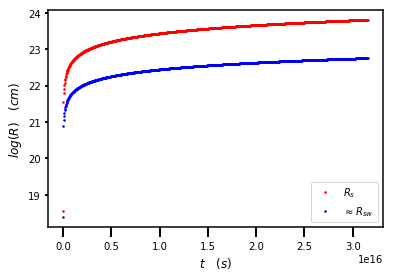

In [5]:
#Plot Rs and ~Rsw vs time --> Rsw larger than Rs as it should be, constant difference between?
plt.plot(time,np.log10(Rs),color='red',linestyle="",marker='.',markersize=3,label=r'$R_s$')
plt.plot(time,np.log10(Rsw_approx),color='blue',linestyle="",marker='.',markersize=3,label=r'$\approx R_{sw}$')
plt.legend(loc='lower right')
plt.ylabel(r'$log(R) \quad (cm)$', fontsize=12)
plt.xlabel(r'$t \quad (s)$', fontsize=12)
plt.savefig('FGShockBubble_logR~VSt.png',bbox_inches='tight')
plt.show()

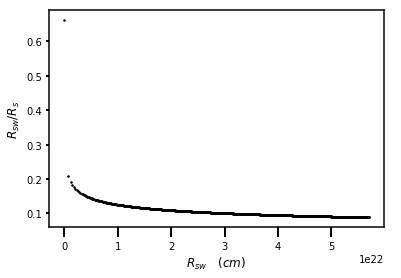

In [6]:
Rs=np.array(Rs)
Rsw_approx=np.array(Rsw_approx)

#Plot ~Rsw/Rs VS Rs to show ratio --> starts off very large, then gets closer 
plt.plot(Rsw_approx,Rsw_approx/Rs,color='black',linestyle="",marker='.',markersize=3)
plt.ylabel(r'$R_{sw}/R_{s}$', fontsize=12)
plt.xlabel(r'$R_{sw} \quad (cm)$', fontsize=12)
plt.savefig('FGShockBubble_Rsw~RsVSRsw.png',bbox_inches='tight')
plt.show()

In [7]:
#TEST CASE:
alpha=1.0

#Calculate root of cubic equation for Rsw using one initial time 
coeff = [1.0, 0.5*vin*time[0], 0, -((A_E(alpha)*(time[0]**Beta_E(alpha)))**3.0)]
roots=np.roots(coeff)
print(str(roots))

#Need to keep real root and discard others (also save as float and not array)
real_root = roots[np.isreal(roots)].real
print(real_root)
print(float(real_root))


[-3.64246347e+18+2.31033138e+18j -3.64246347e+18-2.31033138e+18j
  2.55392695e+18+0.00000000e+00j]
[2.55392695e+18]
2.5539269488758144e+18


In [8]:
#Calculate root of cubic equation for Rsw using all times based on method above
Rsw=[]; alpha=1.0
for t in range(num):
    coeff = [1.0, 0.5*vin*time[t], 0, -((A_E(alpha)*(time[t]**Beta_E(alpha)))**3.0)]
    roots=np.roots(coeff)
    real_root = roots[np.isreal(roots)].real
    for i in range(np.size(real_root)):
        if real_root[i] > 0:
            Rsw.append(float(real_root[i]))

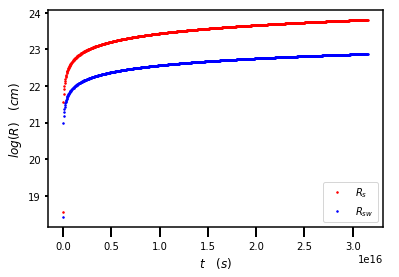

In [9]:
#Plot Rs and Rsw vs time --> lie on top of each other --> roots given back = two complex and Rs...
plt.plot(time,np.log10(Rs),color='red',linestyle="",marker='.',markersize=3,label=r'$R_s$')
plt.plot(time,np.log10(Rsw),color='blue',linestyle="",marker='.',markersize=3,label=r'$R_{sw}$')
plt.legend(loc='lower right')
plt.ylabel(r'$log(R) \quad (cm)$', fontsize=12)
plt.xlabel(r'$t \quad (s)$', fontsize=12)
plt.savefig('FGShockBubble_logRVSt.png',bbox_inches='tight')
plt.show()

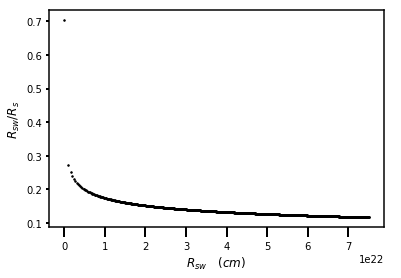

In [10]:
Rsw=np.array(Rsw)

#Plot Rsw/Rs VS Rs to show difference
plt.plot(Rsw,Rsw/Rs,color='black',linestyle="",marker='.',markersize=3)
plt.ylabel(r'$R_{sw}/R_{s}$', fontsize=12)
plt.xlabel(r'$R_{sw} \quad (cm)$', fontsize=12)
plt.savefig('FGShockBubble_RswRsVSRsw.png',bbox_inches='tight')
plt.show()